In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances

In [2]:
data = pd.read_csv('data/megaGymDataset.csv')

In [3]:
data.head()

,S.No.,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [4]:
def to_String(row):
    title = row['Title']
    type = row['Type']
    bodypart = row['BodyPart']
    equipment = row['Equipment']
    level = row['Level']
    return "%s %s %s %s %s"%(title,type,bodypart,equipment,level)

In [5]:
data['string'] = data.apply(to_String,axis=1)
data['string']

0       Partner plank band row Strength Abdominals Ban...
1       Banded crunch isometric hold Strength Abdomina...
2       FYR Banded Plank Jack Strength Abdominals Band...
3       Banded crunch Strength Abdominals Bands Interm...
4           Crunch Strength Abdominals Bands Intermediate
                              ...                        
2913    EZ-bar skullcrusher- Strength Triceps E-Z Curl...
2914    Lying Close-Grip Barbell Triceps Press To Chin...
2915    EZ-Bar Skullcrusher - Gethin Variation Strengt...
2916    TBS Skullcrusher Strength Triceps E-Z Curl Bar...
2917    30 Arms EZ-Bar Skullcrusher Strength Triceps E...
Name: string, Length: 2918, dtype: object

In [6]:
tfidf =  TfidfVectorizer(max_features=2000)
tfidf

TfidfVectorizer(max_features=2000)

In [7]:
X = tfidf.fit_transform(data['string'])
X

<2918x867 sparse matrix of type '<class 'numpy.float64'>'
	with 24302 stored elements in Compressed Sparse Row format>

In [8]:
X.shape

(2918, 867)

In [9]:
# Mapping to be generated
exercisetoidx = pd.Series(data.index,index= data['Title'])
exercisetoidx

Title
Partner plank band row                               0
Banded crunch isometric hold                         1
FYR Banded Plank Jack                                2
Banded crunch                                        3
Crunch                                               4
                                                  ... 
EZ-bar skullcrusher-                              2913
Lying Close-Grip Barbell Triceps Press To Chin    2914
EZ-Bar Skullcrusher - Gethin Variation            2915
TBS Skullcrusher                                  2916
30 Arms EZ-Bar Skullcrusher                       2917
Length: 2918, dtype: int64

In [10]:
idx = exercisetoidx['Crunch']
idx

4

In [11]:
# Accessing the vector corresponding to the exercise address
query = X[idx]
query

<1x867 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [12]:
query.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.36105754, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.62501095, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [13]:
# Comparing the query to every vector in X 
scores =  cosine_similarity(query,X,dense_output=True)
scores

array([[0.36302897, 0.54859408, 0.34688918, ..., 0.02645878, 0.03527706,
        0.02608652]])

In [14]:
scores = scores.flatten()

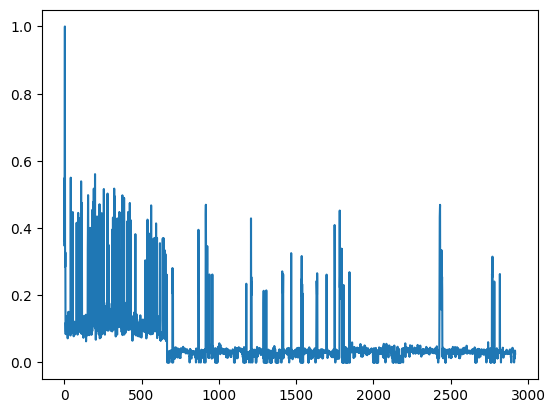

In [15]:
plt.plot(scores);

In [16]:
(-scores).argsort()

array([   4,    3,  199, ..., 2764, 1531, 2418], dtype=int64)

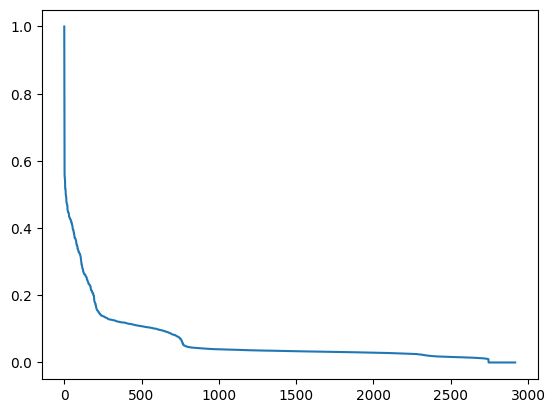

In [17]:
plt.plot(scores[(-scores).argsort()]);

In [18]:
# Getting Top 5 matches
recommend_idx = (-scores).argsort()[1:6]
recommend = data['Title'].iloc[recommend_idx]
recommend_desc = data['Desc'].iloc[recommend_idx]
print(recommend)
print(recommend_desc)

3                     Banded crunch
199                  Reverse crunch
42                  Dumbbell crunch
1      Banded crunch isometric hold
109                    Bench crunch
Name: Title, dtype: object
3      The banded crunch is an exercise targeting the...
199    The reverse crunch is a popular exercise targe...
42     The dumbbell crunch is a more difficult versio...
1      The banded crunch isometric hold is an exercis...
109    The bench crunch is a popular ab exercise perf...
Name: Desc, dtype: object


In [19]:
# Final Function
def recommend(title):
    idx = exercisetoidx[title]
    if type(idx)==pd.Series:
        idx = idx.iloc[0] #incase of multiple titles
    query = X[idx]
    scores = cosine_similarity(query,X,dense_output=True)
    scores = scores.flatten()
    recommend_idx = (-scores).argsort()[1:6]
    return [list(data['Title'].iloc[recommend_idx]),list(data['Desc'].iloc[recommend_idx])]


In [20]:
a =  recommend("Crunch")
a[1][2]

'The dumbbell crunch is a more difficult version of a highly popular abdominal movement. The simple addition of a weight makes the crunch far more difficult, providing a different stimulus to the core during training.'

In [21]:
exercise = input("Exercise done: ")
if((data['Title'].eq(exercise)).any()==True):
    print("Exercise Done:",exercise)
    print("Recommended Exercises next:")
    for i in range(5):
        print("Exercise",i,":")
        print(recommend(exercise)[0][i])
        print("Description:")
        print(recommend(exercise)[1][i])
else: print("Exercise not Found")

Exercise not Found
